In [1]:
# Project ANN Alternative Project - ANN with Multiclass classification

# Guillermo Medina

# Mounting the drive in Google Colab to use the files
from google.colab import drive
drive.mount('/content/drive')

# Importing the required packages and loading the .h5 type data file using the h5py package  
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Calling the sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Calling the keras libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
# Declare tensorflow as tf
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
# Open the SVHN Single Gray file as read only
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

In [4]:
# Shape of the x train set
X_train.shape

(42000, 32, 32)

In [5]:
# shape of the y train set
y_test.shape

(18000,)

In [6]:
# y test set array
y_test.view()

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [7]:
# Converting the class vectors for y training data and y test data to binary class matrix with 10 classes.
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [8]:
# The y train data set in binary
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(42000, 10)
First 5 examples now are:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


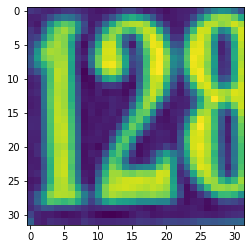

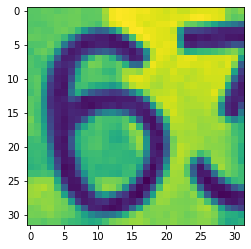

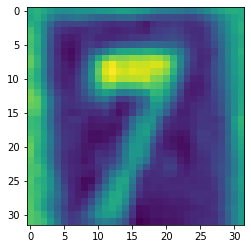

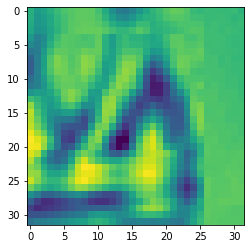

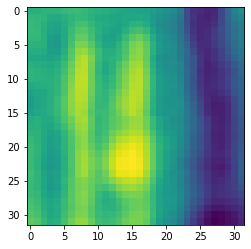

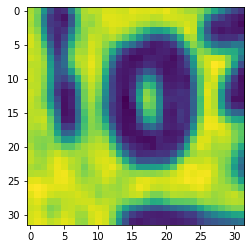

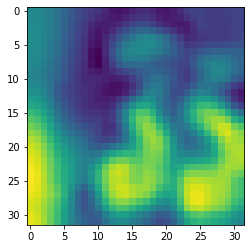

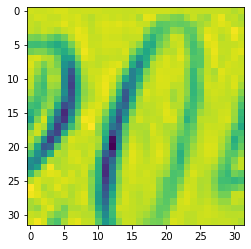

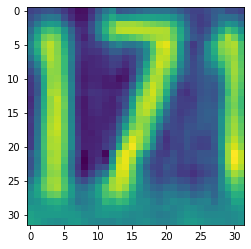

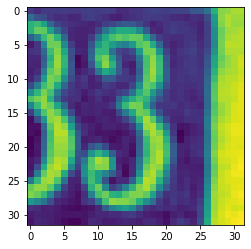

In [9]:
# Visualize the data. Plot the first 10 images.
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)

In [10]:
# Value counts
L=pd.DataFrame(y_train)
L[0].value_counts()

0.0    37814
1.0     4186
Name: 0, dtype: int64

In [11]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [12]:
#Reshape data from 2D to 1D ->32*32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [13]:
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [14]:
# Compile the model
# Optimizer as sgd, loss with Categorical crossentropy and metric parameters to measure accuracy of the compile function. 
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [21]:
# Fit the model
model.fit(X_train, y_train,epochs=200,validation_data=(X_test,y_test),batch_size=X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 1s 506ms/step - loss: 30.3699 - accuracy: 0.1140 - val_loss: 30.2029 - val_accuracy: 0.1166
Epoch 2/200
1/1 [==============================] - 0s 360ms/step - loss: 30.1609 - accuracy: 0.1137 - val_loss: 30.0064 - val_accuracy: 0.1173
Epoch 3/200
1/1 [==============================] - 0s 364ms/step - loss: 29.9604 - accuracy: 0.1141 - val_loss: 29.7974 - val_accuracy: 0.1174
Epoch 4/200
1/1 [==============================] - 0s 363ms/step - loss: 29.7535 - accuracy: 0.1148 - val_loss: 29.6052 - val_accuracy: 0.1175
Epoch 5/200
1/1 [==============================] - 0s 330ms/step - loss: 29.5529 - accuracy: 0.1143 - val_loss: 29.4089 - val_accuracy: 0.1168
Epoch 6/200
1/1 [==============================] - 0s 351ms/step - loss: 29.3526 - accuracy: 0.1136 - val_loss: 29.2117 - val_accuracy: 0.1182
Epoch 7/200
1/1 [==============================] - 0s 375ms/step - loss: 29.1564 - accuracy: 0.1137 - val_loss: 29.0242 - val_accuracy: 0.1174

In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.119
Loss: 18.328


In [23]:
y_predict = model.predict(X_test)

In [24]:
y_predict[0]

array([2.6875287e-01, 1.3872325e-07, 8.9848146e-07, 7.6519129e-08,
       8.8243417e-02, 8.1796706e-08, 1.1675789e-07, 6.4298540e-01,
       1.6977694e-05, 4.5762980e-09], dtype=float32)

In [25]:
np.argmax(y_predict[0])

7

In [26]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
###############################    Conclusion    #################################
# Categorical crossentropy was used as the loss function that performed a multiclass classification task.
# The optimized model provides the best results by giving us an improvement in accuracy
# The 'SGD' and 'Adam' optimizers were tested. 'Adam' provided the best results. 
# Softmax was used in the output layer of our Artificial Neural Network (ANN) model to predict the multinomial probability distribution.
# After fitting the model the loss number improved 
# More epocs were tested, yet the model stopped getting better results after 200 epocs.


In [ ]:
##################################################################################